## Part 1b - Simpson's paradox

Let’s imagine we are in a laboratory and want to test the effectiveness of a new treatment for a disease that affects both humans and dogs. Our goal is to see whether the treatment helps improve the chances of survival.

In the experiment, we treat one dog and four people. After the treatment, the dog and one person survive, while the other three people die. In the group that does not receive treatment, there are four dogs and one person; of these, three dogs recover, but one dog and the person die.

If we look at the results by species, the treatment seems effective. Among the treated dogs, 100% survive, while 75% of the untreated dogs recover. Among the treated humans, 25% survive, while none of the untreated humans survive. In both cases, the treatment appears to increase the chances of recovery.

However, when all the data are combined, the interpretation changes. Across all treated dogs and humans, only 40% survive, while among the untreated group, 60% recover. This gives the impression that the treatment actually worsens the chances of survival.

The reason for this apparent contradiction requires analyzing the context. It is possible that the disease is more severe in humans, making them more likely to receive treatment. Therefore, even though the treatment increases the chances of survival, the treated humans had a higher risk from the start. Additionally, if humans have greater access to treatment than dogs, the overall results reflect this difference in distribution rather than the true effectiveness of the treatment.

This example illustrates Simpson’s Paradox, where the combined results of several groups can show a trend opposite to what is observed within each group. To correctly interpret the data, it is essential to consider the context and the causal factors influencing the outcomes.

C:\Users\Dafne\AppData\Local\Temp\ipykernel_47040\2284582815.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_a = model_a.params[0] + model_a.params[1] * x_vals
C:\Users\Dafne\AppData\Local\Temp\ipykernel_47040\2284582815.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_pred_b = model_b.params[0] + model_b.params[1] * x_vals
C:\Users\Dafne\AppData\Local\Temp\ipykernel_47040\2284582815.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

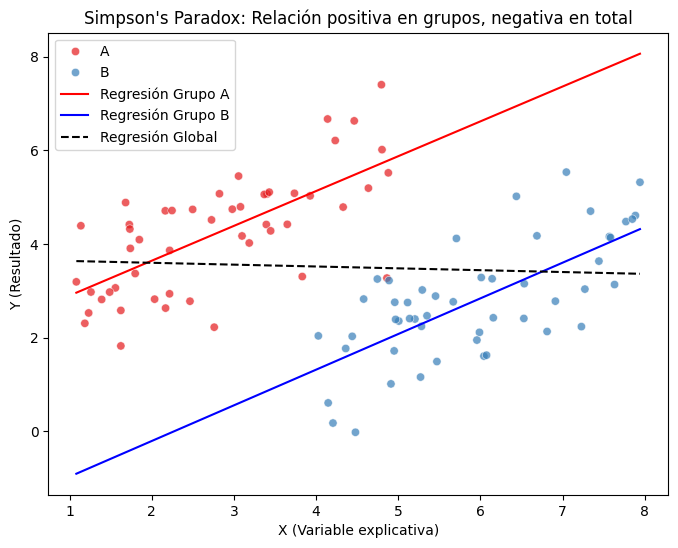

Pendiente Grupo A: 0.744
Pendiente Grupo B: 0.762
Pendiente Global: -0.039


C:\Users\Dafne\AppData\Local\Temp\ipykernel_47040\2284582815.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Pendiente Grupo A:", round(model_a.params[1], 3))
C:\Users\Dafne\AppData\Local\Temp\ipykernel_47040\2284582815.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Pendiente Grupo B:", round(model_b.params[1], 3))
C:\Users\Dafne\AppData\Local\Temp\ipykernel_47040\2284582815.py:64: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Seed para reproducibilidad
np.random.seed(42)

# Simulación de datos
n = 50

# Grupo A
x_a = np.random.uniform(1, 5, n)
y_a = 2 + 0.8 * x_a + np.random.normal(0, 1, n)

group_a = pd.DataFrame({"x": x_a, "y": y_a, "group": "A"})

# Grupo B (desplazado en el eje X)
x_b = np.random.uniform(4, 8, n)
y_b = -2 + 0.8 * x_b + np.random.normal(0, 1, n)

group_b = pd.DataFrame({"x": x_b, "y": y_b, "group": "B"})

# Combinar

data = pd.concat([group_a, group_b], ignore_index=True)

# Función para ajustar regresión lineal
def fit_line(x, y):
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    return model

# Modelos
model_a = fit_line(group_a["x"], group_a["y"])
model_b = fit_line(group_b["x"], group_b["y"])
model_all = fit_line(data["x"], data["y"])

# Preparar datos para líneas de regresión
x_vals = np.linspace(data["x"].min(), data["x"].max(), 100)

y_pred_a = model_a.params[0] + model_a.params[1] * x_vals
y_pred_b = model_b.params[0] + model_b.params[1] * x_vals
y_pred_all = model_all.params[0] + model_all.params[1] * x_vals

# Graficar
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="x", y="y", hue="group", palette="Set1", alpha=0.7)

plt.plot(x_vals, y_pred_a, color="red", label="Regresión Grupo A")
plt.plot(x_vals, y_pred_b, color="blue", label="Regresión Grupo B")
plt.plot(x_vals, y_pred_all, color="black", linestyle="--", label="Regresión Global")

plt.title("Simpson's Paradox: Relación positiva en grupos, negativa en total")
plt.xlabel("X (Variable explicativa)")
plt.ylabel("Y (Resultado)")
plt.legend()
plt.show()

# Imprimir pendientes
print("Pendiente Grupo A:", round(model_a.params[1], 3))
print("Pendiente Grupo B:", round(model_b.params[1], 3))
print("Pendiente Global:", round(model_all.params[1], 3))